In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

from MultiArmedBandit import Arm, bernoulliArm, evolvingBernoulliArm
from Exp3 import exp3, exp3P, exp3_IX
from OtherBanditAlgorithms import UCB1, Random

Populating the interactive namespace from numpy and matplotlib


### Deterministic periodic adversary

At each turn only one of the arms has a reward 1.

Exp3 are much better than UCB, but appears more or less as a random algorithm

In [2]:
T = 10000

nb_arms = 10

Rewards = [[0 for _ in range(T)] for _ in range(nb_arms)]
for i in range(T):
    Rewards[(i+1) % nb_arms][i] = 1
MAB = [Arm(rewards_sequence=Rewards[i]) for i in range(nb_arms)]

In [5]:
#set up the parameters
K = len(MAB)
delta = 0.05

# Exp3 parameters
gamma_exp3 = np.sqrt(K * log(K) / ((np.exp(1) - 1) * T))
eta = np.sqrt(2 * np.log(K) / T * K)

# Exp3.P parameters
eta_P = 0.95 * np.sqrt(np.log(K) / (T * K))
beta_P = np.sqrt(np.log(K / delta) /  (T * K))
gamma_P = 1.05 * np.sqrt(np.log(K) * K / T)

# Exp3-IX parameters
eta_IX = np.sqrt(2 * np.log(K) / T * K)
gamma_IX = eta_IX / 2

In [6]:
rew, _, _ = exp3(MAB, T, eta=eta, gamma=gamma_exp3)
rew_P, _, _ = exp3P(MAB, T, beta=beta_P, gamma=gamma_P, eta=eta_P)
rew_IX, _, _ = exp3_IX(MAB, T, eta=eta_IX, gamma=gamma_IX)
rew_UCB = UCB1(MAB, T, rho=0.2)
rew_random = Random(MAB, T)

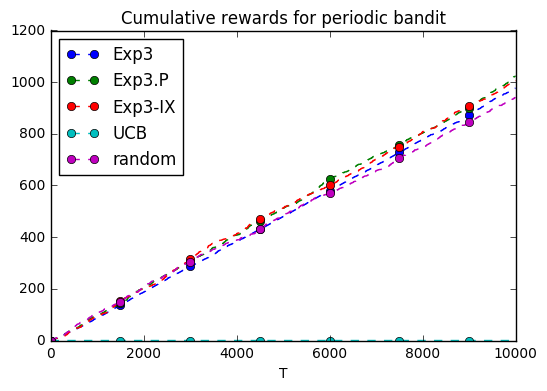

In [7]:
exp3_cumsum = np.cumsum(rew)
exp3_P_cumsum = np.cumsum(rew_P)
exp3_IX_cumsum = np.cumsum(rew_IX)
UCB_cumsum = np.cumsum(rew_UCB)
rew_cumsum = np.cumsum(rew_random)

plt.plot(exp3_cumsum, '--o', markevery=1500, label="Exp3")

plt.plot(exp3_P_cumsum, '--o', markevery=1500, label="Exp3.P")
plt.plot(exp3_IX_cumsum, '--o', markevery=1500, label="Exp3-IX")
plt.plot(UCB_cumsum, '--o', markevery=1500, label="UCB")
plt.plot(rew_cumsum, '--o', markevery=1500, label="random")

plt.legend(loc="upper left")
plt.title("Cumulative rewards for periodic bandit")
plt.xlabel("T")
savefig("PeriodicReward", dpi=500)